<a href="https://colab.research.google.com/github/dakuamoah/DAA_ML/blob/main/Suzuki_Coupling_datasetD_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install rdkit-pypi==2023.3.1b1

['Collecting rdkit-pypi==2023.3.1b1',
 '  Downloading rdkit_pypi-2023.3.1b1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.11/dist-packages (from rdkit-pypi==2023.3.1b1) (1.26.4)',
 'Requirement already satisfied: Pillow in /usr/local/lib/python3.11/dist-packages (from rdkit-pypi==2023.3.1b1) (11.1.0)',
 'Downloading rdkit_pypi-2023.3.1b1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.7 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/29.7 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/29.7 MB\x1b \x1b2.2 MB/s\x1b eta \x1b0:00:14\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.3/29.7 MB\x1b \x1b3.8 MB/s\x1b eta \x1b0:00:08\x1b',
 '\x1b[2K   \x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.5/29.7 MB\x1b \x1b4.8 MB/s\x1b eta \x1b0:00:07\x1b',
 '\x1b[2

In [ ]:
!pip install lightgbm
!pip install dask[dataframe]

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-------------------------------------------------------
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import ExplicitBitVect
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from tqdm import tqdm

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs

#--------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import ShuffleSplit, cross_validate,train_test_split
#--------------------------------------------------------
from lightgbm import LGBMRegressor

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [ ]:
#Read Data Frame
data = pd.read_csv('S_M_DatasetD.csv')
data

,Electrophile,Nucleophile,Ligand,Base,Solvent,Yld
0,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,CC(C)(C)P(C(C)(C)C)C(C)(C)C,[OH-].[Na+],CC#N,4.76
1,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,c1ccc(cc1)P(c2ccccc2)c3ccccc3,[OH-].[Na+],CC#N,4.12
2,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,CN(C)c1ccc(cc1)P(C(C)(C)C)C(C)(C)C,[OH-].[Na+],CC#N,2.58
3,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,C1CCC(CC1)P(C2CCCCC2)C3CCCCC3,[OH-].[Na+],CC#N,4.44
4,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,[OH-].[Na+],CC#N,1.95
...,...,...,...,...,...,...
3075,IC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1[B-](F)(F)F,COc1cccc(c1c2ccccc2P(C3CCCCC3)C4CCCCC4)OC,[K+].[K+].[K+].[O-]P([O-])([O-])=O,CO,68.51
3076,IC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1[B-](F)(F)F,[Fe].CC(C)(C)P([C]1[CH][CH][CH][CH]1)C(C)(C)C....,[K+].[K+].[K+].[O-]P([O-])([O-])=O,CO,66.43
3077,IC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1[B-](F)(F)F,P(c2ccccc2c1c(cc(cc1C(C)C)C(C)C)C(C)C)(C3CCCCC...,[K+].[K+].[K+].[O-]P([O-])([O-])=O,CO,67.02
3078,IC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1[B-](F)(F)F,[Fe].[CH]1[CH][CH][C]([CH]1)P(c2ccccc2)c3ccccc...,[K+].[K+].[K+].[O-]P([O-])([O-])=O,CO,71.12


In [ ]:
#We calculate fingerprints of Aryl halide, Boronic Partner, Ligand, base and solvent then we concatenate them
def Calculate_Avfps(data,nBits):

    # Store fingerprints using empty lists
    Avalon_fpts = []

    mols = [Chem.MolFromSmiles(x) for x in data if x is not None]
    for mol in tqdm(mols):


        #=============================
        # calculate Avalon fingerprints
        #=============================
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=nBits)
        Avalon_fpts.append(avfpts)


    #=================================
    # return the lists as numpy array
    #=================================
    return np.array(Avalon_fpts)

In [ ]:
data.head()

,Electrophile,Nucleophile,Ligand,Base,Solvent,Yld
0,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,CC(C)(C)P(C(C)(C)C)C(C)(C)C,[OH-].[Na+],CC#N,4.76
1,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,c1ccc(cc1)P(c2ccccc2)c3ccccc3,[OH-].[Na+],CC#N,4.12
2,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,CN(C)c1ccc(cc1)P(C(C)(C)C)C(C)(C)C,[OH-].[Na+],CC#N,2.58
3,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,C1CCC(CC1)P(C2CCCCC2)C3CCCCC3,[OH-].[Na+],CC#N,4.44
4,ClC1=CC=C(N=CC=C2)C2=C1,CC1=CC=C(N(C2OCCCC2)N=C3)C3=C1B(O)O,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,[OH-].[Na+],CC#N,1.95


In [ ]:
ligand_fpts =  Calculate_Avfps(data['Ligand'], 2048)
solvent_fpts =  Calculate_Avfps(data['Solvent'], 1024)
base_fpts =  Calculate_Avfps(data['Base'], 1024)
electrophile_fpts =  Calculate_Avfps(data['Electrophile'], 1024)
nucleophile_fpts =  Calculate_Avfps(data['Nucleophile'], 1024)

100%|██████████| 3080/3080 [00:01<00:00, 1778.84it/s]


In [ ]:
#Concatenate fingerprints of starting materials
# the order of the concatenation would not matter

concatenated = np.concatenate((ligand_fpts,solvent_fpts,base_fpts,electrophile_fpts,nucleophile_fpts),axis=1)
concatenated.shape

(3080, 6144)

In [ ]:
# Now let us put this into a data frame

concatenated_df = pd.DataFrame(concatenated,columns=['Col_A_{}'.format(i + 1) for i in range(concatenated.shape[1])])
concatenated_df



,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_6135,Col_A_6136,Col_A_6137,Col_A_6138,Col_A_6139,Col_A_6140,Col_A_6141,Col_A_6142,Col_A_6143,Col_A_6144
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,1,1
3076,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,1,1
3077,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,1,1
3078,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,1,1


In [ ]:
#Lets use light LGBM to train our model

#Instantiate the models

lgbm_av = LGBMRegressor(n_estimators=800, random_state=42)
model_rf = RandomForestRegressor(random_state=42)

In [ ]:
# 10 fold cross validation

# start time
start = time.time()

# from Sklearn -shuffle and split data
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

scoring = ['r2','neg_root_mean_squared_error','neg_mean_absolute_error']

scores_CN = cross_validate(lgbm_av, concatenated_df,  data.Yld, scoring=scoring, cv=cv)


print(scores_CN)
# wait for 3 seconds

time.sleep(3)
# get the end time
end = time.time()

# get the execution time
total_time = end - start
print('Total time required:', round(total_time/60, 2), 'min')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 2156, number of used features: 608
[LightGBM] [Info] Start training from score 48.335974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 2156, number of used features: 608
[LightGBM] [Info] Start training from score 48.216531
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [ ]:
# Lets access the r2 values
scores_CN['test_r2']

array([0.90710059, 0.90003985, 0.89373227, 0.90618574, 0.89498948,
       0.89451075, 0.90814224, 0.88484696, 0.90715349, 0.88803237])

In [ ]:
# Mean values of tenfold cross-validation of R^2 and RMSE and MAE
#Using lightGBM

print("R^2 :", round(np.mean(scores_CN['test_r2']), 2))
print("RMSE :", round(np.mean(-scores_CN['test_neg_root_mean_squared_error']), 2))
print('MAE:', round(np.mean(-scores_CN['test_neg_mean_absolute_error']), 2))

R^2 : 0.9
RMSE : 9.61
MAE: 6.91


**Now Lets train our with all the features using 70 percent of the data for training and 30% for testing**

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(concatenated_df, data.Yld,
                                                    test_size=0.3, shuffle=True,random_state=42)

In [ ]:
#Model training and Prediction
#All the features are used here

model_all_features = LGBMRegressor(n_estimators=800, random_state=42)
model_all_features.fit(X_train, y_train)
predict_yld_all_features = model_all_features.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 2156, number of used features: 608
[LightGBM] [Info] Start training from score 48.335974


In [ ]:
# Lets calculate RMSE and coefficient of determination R2

RMSE_all =np.sqrt(mean_squared_error(y_test, predict_yld_all_features))
R2_all = r2_score(y_test, predict_yld_all_features)
MAE_all = mean_absolute_error(y_test, predict_yld_all_features)

print('R2:', round(R2_all, 2))
print('RMSE:', round(RMSE_all, 2))
print('MAE:', round(MAE_all, 2))

R2: 0.91
RMSE: 9.24
MAE: 6.69


In [ ]:
#feature Importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_all_features, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

ModuleNotFoundError: No module named 'eli5'

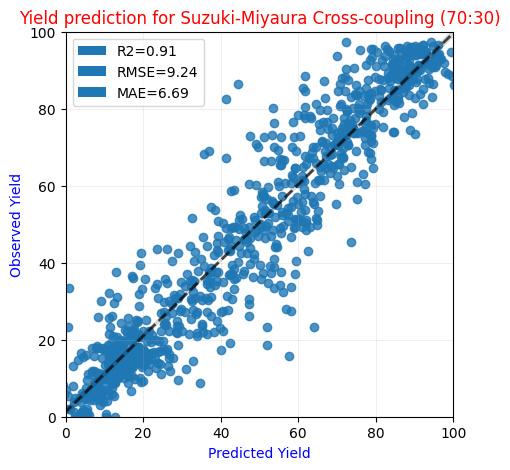

In [ ]:
# Lets plot our model

# Plot predicted and observed yields
plt.figure(figsize=(5,5))
sns.regplot(x=predict_yld_all_features, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Yield prediction for Suzuki-Miyaura Cross-coupling (70:30)", color='red')
plt.grid(alpha=0.2)
R2_all = mpatches.Patch(label="R2={:04.2f}".format(R2_all))
RMSE_all = mpatches.Patch(label="RMSE={:4.2f}".format(RMSE_all))
MAE_all = mpatches.Patch(label="MAE={:4.2f}".format(MAE_all))
plt.legend(handles=[R2_all, RMSE_all, MAE_all])

# Lets train Model on 90% of data and use 10 percent of data for testing

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(concatenated_df, data.Yld,
                                                    test_size=0.1, shuffle=True,random_state=42)

In [ ]:
#Model training and Prediction
#All the features are used here

#Model_2: Use 90% for training

model_2 = LGBMRegressor(n_estimators=800, random_state=42)
model_2.fit(X_train, y_train)
predict_yield = model_2.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 2772, number of used features: 608
[LightGBM] [Info] Start training from score 48.005325


In [ ]:
from re import M
# Lets calculate RMSE and coefficient of determination R2 for model_2

RMSE_all =np.sqrt(mean_squared_error(y_test, predict_yield))
R2_all = r2_score(y_test, predict_yield)
MAE_all = mean_absolute_error(y_test, predict_yield)

print('RMSE:', round(RMSE_all, 2))
print('R2:', round(R2_all, 2))
print('MAE:', round(MAE_all, 2))

RMSE: 8.77
R2: 0.92
MAE: 6.45


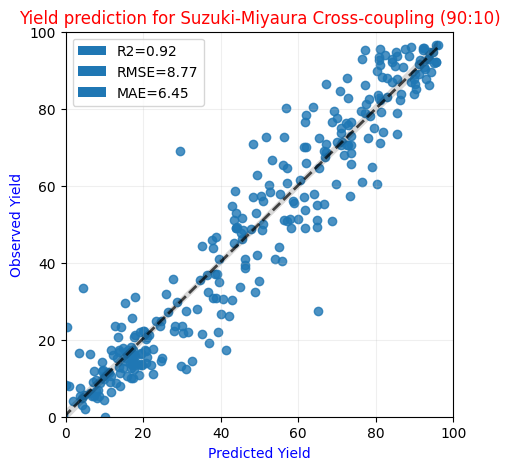

In [ ]:
# Lets plot our model

# Plot predicted and observed yields
plt.figure(figsize=(5,5))
sns.regplot(x=predict_yield, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Yield prediction for Suzuki-Miyaura Cross-coupling (90:10)", color='red')
plt.grid(alpha=0.2)
R2_all = mpatches.Patch(label="R2={:04.2f}".format(R2_all))
RMSE_all = mpatches.Patch(label="RMSE={:4.2f}".format(RMSE_all))
MAE_all = mpatches.Patch(label="MAE={:4.2f}".format(MAE_all))
plt.legend(handles=[R2_all, RMSE_all, MAE_all])

# Lets train Model on 50% of data and use 50 percent of data for testing

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(concatenated_df, data.Yld,
                                                    test_size=0.5, shuffle=True,random_state=42)

In [ ]:
#Model training and Prediction
#All the features are used here

#Model_2: Use 90% for training

model_3 = LGBMRegressor(n_estimators=800, random_state=42)
model_3.fit(X_train, y_train)
predict_yield3 = model_3.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 608
[LightGBM] [Info] Start training from score 48.138701


In [ ]:
# Lets calculate RMSE and coefficient of determination R2 for model_2

RMSE_all =np.sqrt(mean_squared_error(y_test, predict_yield3))
R2_all = r2_score(y_test, predict_yield3)
MAE_all = mean_absolute_error(y_test, predict_yield3)

print('RMSE:', round(RMSE_all, 2))
print('R2:', round(R2_all, 2))
print('MAE:', round(MAE_all, 2))

RMSE: 10.52
R2: 0.88
MAE: 7.77


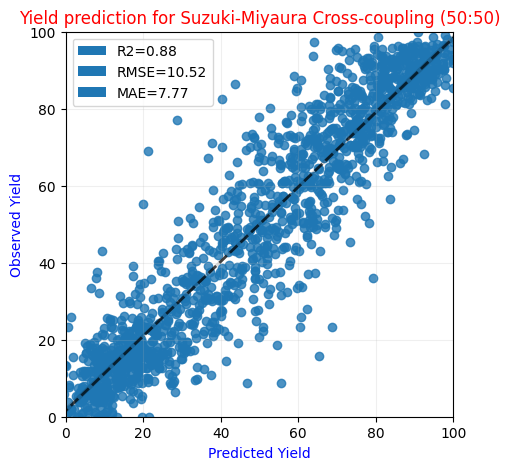

In [ ]:
# Lets plot our model

# Plot predicted and observed yields
plt.figure(figsize=(5,5))
sns.regplot(x=predict_yield3, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Yield prediction for Suzuki-Miyaura Cross-coupling (50:50)", color='red')
plt.grid(alpha=0.2)
R2_all = mpatches.Patch(label="R2={:04.2f}".format(R2_all))
RMSE_all = mpatches.Patch(label="RMSE={:4.2f}".format(RMSE_all))
MAE_all = mpatches.Patch(label="MAE={:4.2f}".format(MAE_all))
plt.legend(handles=[R2_all, RMSE_all, MAE_all])